In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [3]:
# Identify duplicate rows
duplicate_rows = df[df.duplicated()]

# Display the duplicate rows
print("Duplicate rows:")
print(duplicate_rows)

# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Display the shape of the cleaned DataFrame to verify the removal
print(f"Number of rows after removing duplicates: {df_cleaned.shape[0]}")



Duplicate rows:
Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWith, OfficeStackAsyncAdmired, OfficeStackSyncHaveWorkedWith, Of

In [4]:
# Count missing values in the 'CodingActivities' column
missing_coding_activities = df['CodingActivities'].isnull().sum()

# Display the result
print(f"Number of missing values in 'CodingActivities' column: {missing_coding_activities}")


Number of missing values in 'CodingActivities' column: 10971


In [6]:
# Impute missing values in the 'CodingActivities' column using forward-fill
df['CodingActivities'] = df['CodingActivities'].ffill()

# Display the first few rows to confirm the imputation
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3  Hobby;Contribute to open-source projects;Other...   
4  Hobby;Contribute to open-source

In [7]:
# Drop rows where 'ConvertedCompYearly' is NaN
df.dropna(subset=['ConvertedCompYearly'], inplace=True)

# Display the first few rows to ensure missing values are removed
print(df.head())


     ResponseId                                         MainBranch  \
72           73                     I am a developer by profession   
374         375  I am not primarily a developer, but I write co...   
379         380                     I am a developer by profession   
385         386                     I am a developer by profession   
389         390                     I am a developer by profession   

                 Age                                         Employment  \
72   18-24 years old  Employed, full-time;Student, full-time;Indepen...   
374  25-34 years old                                Employed, full-time   
379  35-44 years old                                Employed, full-time   
385  35-44 years old  Independent contractor, freelancer, or self-em...   
389  25-34 years old             Employed, full-time;Student, part-time   

                               RemoteWork   Check  \
72   Hybrid (some remote, some in-person)  Apples   
374  Hybrid (some remo

In [8]:
# List all column names to check for compensation-related columns
print(df.columns)

# Check the first few rows to see the content of the columns
print(df[['ConvertedCompYearly']].head())

# Check for any other columns related to compensation (e.g., 'Salary', 'Comp', etc.)
compensation_columns = [col for col in df.columns if 'Comp' in col or 'Salary' in col]
print(compensation_columns)

# Display the first few rows of these identified columns
print(df[compensation_columns].head())


Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)
     ConvertedCompYearly
72                7322.0
374              30074.0
379              91295.0
385              53703.0
389             110000.0
['CompTotal', 'AIComplex', 'ConvertedCompYearly']
     CompTotal                                      AIComplex  \
72   2040000.0  Good, but not great at handling complex tasks   
374    28000.0                                            NaN   
379    85000.0                  Bad at handling complex tasks   
385    50000.0                                            NaN   
389   110000.0  Neither good or bad at handling complex tasks   

     ConvertedCompYe

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the 'ConvertedCompYearly' column
df['ConvertedCompYearly_MinMax'] = scaler.fit_transform(df[['ConvertedCompYearly']])

# Display the first few rows to check the result
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax']].head())


     ConvertedCompYearly  ConvertedCompYearly_MinMax
72                7322.0                    0.000450
374              30074.0                    0.001850
379              91295.0                    0.005616
385              53703.0                    0.003303
389             110000.0                    0.006766


In [10]:
# Calculate the mean and standard deviation of the 'ConvertedCompYearly' column
mean_compensation = df['ConvertedCompYearly'].mean()
std_compensation = df['ConvertedCompYearly'].std()

# Apply Z-score normalization
df['ConvertedCompYearly_Zscore'] = (df['ConvertedCompYearly'] - mean_compensation) / std_compensation

# Display the first few rows to check the result
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_Zscore']].head())


     ConvertedCompYearly  ConvertedCompYearly_Zscore
72                7322.0                   -0.422117
374              30074.0                   -0.300290
379              91295.0                    0.027521
385              53703.0                   -0.173767
389             110000.0                    0.127678


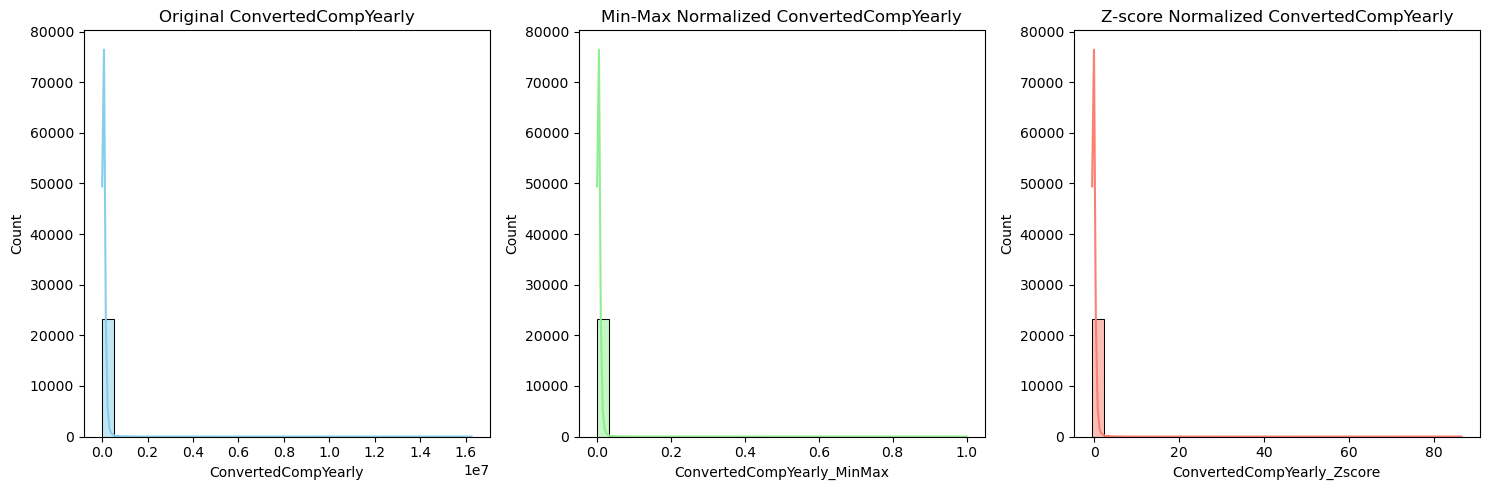

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure with 3 subplots
plt.figure(figsize=(15, 5))

# Histogram for the original ConvertedCompYearly
plt.subplot(1, 3, 1)
sns.histplot(df['ConvertedCompYearly'], kde=True, color='skyblue', bins=30)
plt.title('Original ConvertedCompYearly')

# Histogram for the Min-Max normalized ConvertedCompYearly
plt.subplot(1, 3, 2)
sns.histplot(df['ConvertedCompYearly_MinMax'], kde=True, color='lightgreen', bins=30)
plt.title('Min-Max Normalized ConvertedCompYearly')

# Histogram for the Z-score normalized ConvertedCompYearly
plt.subplot(1, 3, 3)
sns.histplot(df['ConvertedCompYearly_Zscore'], kde=True, color='salmon', bins=30)
plt.title('Z-score Normalized ConvertedCompYearly')

# Adjust layout for better display
plt.tight_layout()
plt.show()
